<a href="https://colab.research.google.com/github/SenorFoca/High-Frecuency-Trading/blob/main/HFT_CW1_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [25]:
#Initial values for simulation
S1_0 =    323.7600
S2_0 =    529.0500
rho =     0.5643
beta =    0.5651
mu_1 =    0.0134
mu_2 =    0.0093
sigma_1 = 0.0078
sigma_2 = 0.0079
gamma =   0.5
delta =   1
T =       1
M =       390
z_0 =     0

print("Initial Values for the Simulation:")
print(f"S1_0 =    {S1_0:.4f}")
print(f"S2_0 =    {S2_0:.4f}")
print(f"rho =     {rho:.4f}")
print(f"beta =    {beta:.4f}")
print(f"mu_1 =    {mu_1:.4f}")
print(f"mu_2 =    {mu_2:.4f}")
print(f"sigma_1 = {sigma_1:.4f}")
print(f"sigma_2 = {sigma_2:.4f}")
print(f"gamma =   {gamma}")
print(f"delta =   {delta}")
print(f"T =       {T}")
print(f"M =       {390}")
print(f"z_0 =     {0}")

Initial Values for the Simulation:
S1_0 =    323.7600
S2_0 =    529.0500
rho =     0.5643
beta =    0.5651
mu_1 =    0.0134
mu_2 =    0.0093
sigma_1 = 0.0078
sigma_2 = 0.0079
gamma =   0.5
delta =   1
T =       1
M =       390
z_0 =     0


In [8]:
# Calculate the time increment per step
dt = T/M
# Initialize arrays for simulation:
# S1 and S2 will store the simulated stock price trajectories
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
# z will store the simulated cointegrating spread
z =  np.zeros((M + 1, 1))
# a, b, c are control parameters
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
# Pi_1 and Pi_2 will store the optimal trading weights
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [9]:
# Create an array for time points spanning
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
# Compute the combined volatility of the cointegrating proces
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
# Calculate the mean reversion level (eta) for the spread process
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
# Generate random noise for the simulation:
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape)
rn2 = np.random.standard_normal(S2.shape)
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
     # Simulate Visas price (S1)
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
     # Simulate Mastercard's price (S2)
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

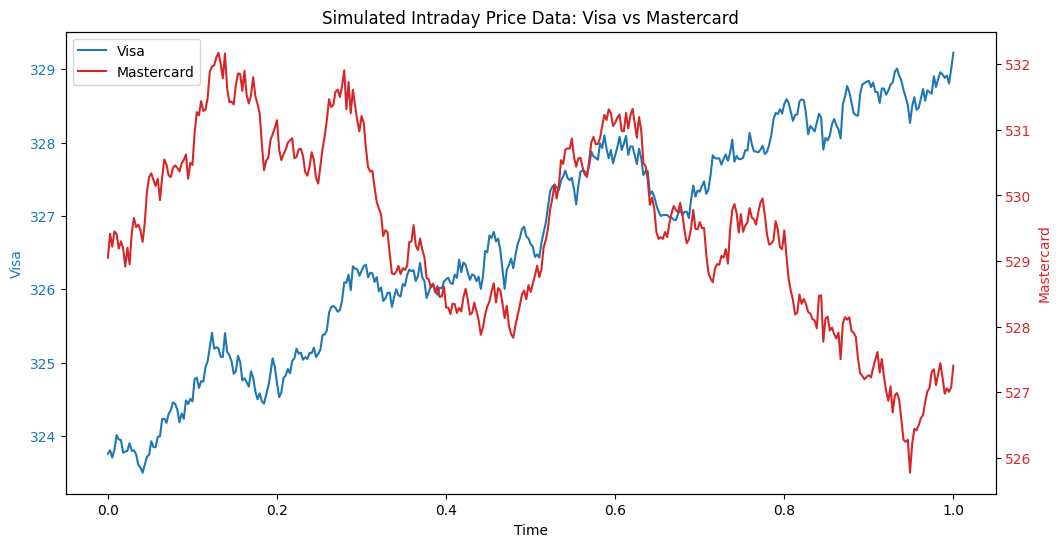

In [12]:
# Plotting the simulated intraday close prices for Visa and Mastercard
fig, ax1 = plt.subplots(figsize=(12, 6))

color_visa = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Visa', color=color_visa)
ax1.plot(tt, S1, color=color_visa, label='Visa')
ax1.tick_params(axis='y', labelcolor=color_visa)

ax2 = ax1.twinx()
color_mastercard = 'tab:red'
ax2.set_ylabel('Mastercard', color=color_mastercard)
ax2.plot(tt, S2, color=color_mastercard, label='Mastercard')
ax2.tick_params(axis='y', labelcolor=color_mastercard)

lines_visa, labels_visa = ax1.get_legend_handles_labels()
lines_mastercard, labels_mastercard = ax2.get_legend_handles_labels()
ax1.legend(lines_visa + lines_mastercard, labels_visa + labels_mastercard, loc='upper left')

plt.title("Simulated Intraday Price Data: Visa vs Mastercard")
plt.show()

Text(0.5, 1.0, 'Simulation of Cointegrated Vector (z)')

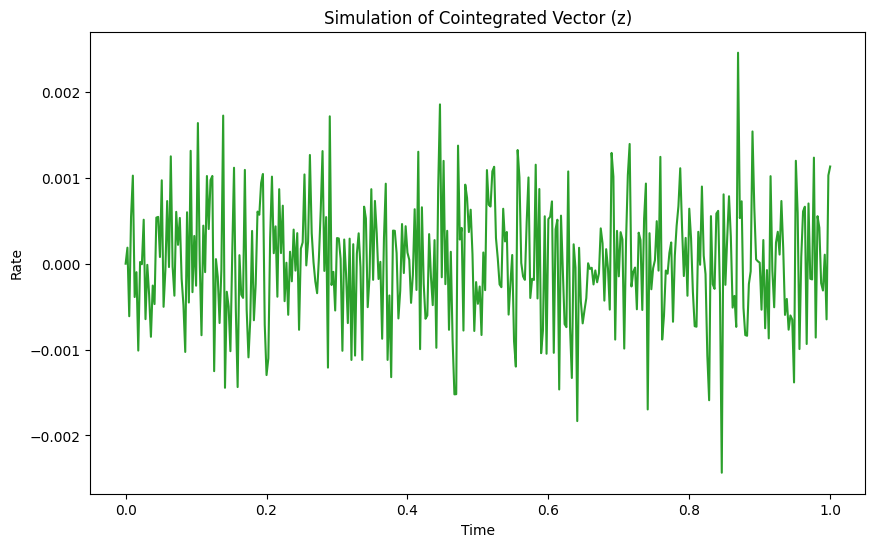

In [23]:
# Plot the simulated cointegrating spread (z)
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'tab:green', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Simulation of Cointegrated Vector (z)')

In [14]:
# Recalculate the control parameters and optimal trading weights
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

In [15]:
print(f'Simulates pi 1: {Pi_1.mean()}')
print(f'Simulated pi 2: {Pi_2.mean()}')

Simulates pi 1: 0.6070949110335548
Simulated pi 2: -0.06573901581471935


Text(0.5, 1.0, 'Simulated Weights')

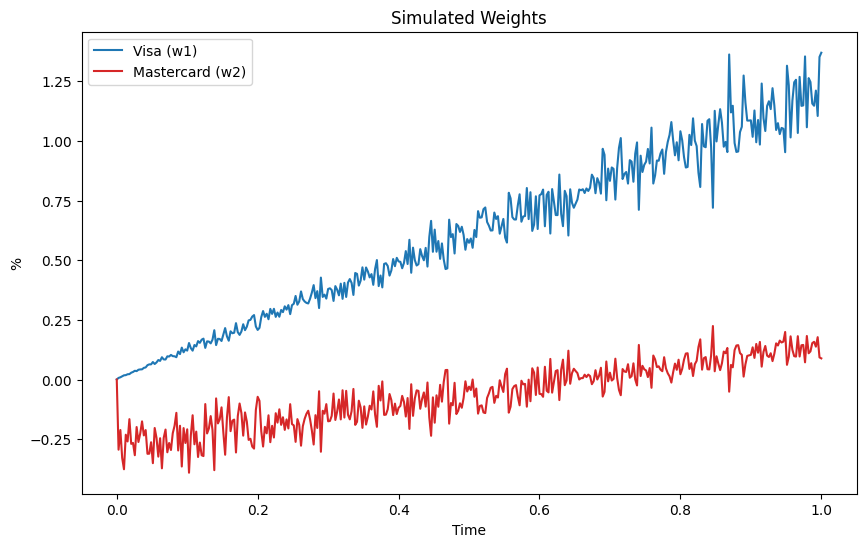

In [20]:
# Plot of Simulated Weights
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'tab:blue', lw=1.5, label='Visa (w1)')
plt.plot(tt, Pi_2, 'tab:red', lw=1.5, label='Mastercard (w2)')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Simulated Weights')

Text(0.5, 1.0, 'Simulated Optimal Cash')

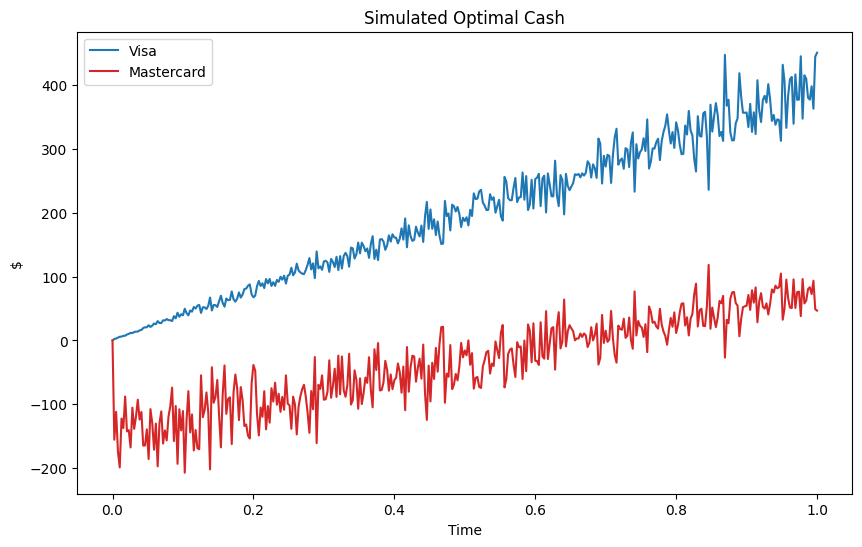

In [21]:
# Plot of Simulated Optimal Cash
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'tab:blue', lw=1.5, label='Visa')
plt.plot(tt, Pi_2 * S2, 'tab:red', lw=1.5, label='Mastercard')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Simulated Optimal Cash')

Text(0.5, 1.0, 'Simulated Wealth')

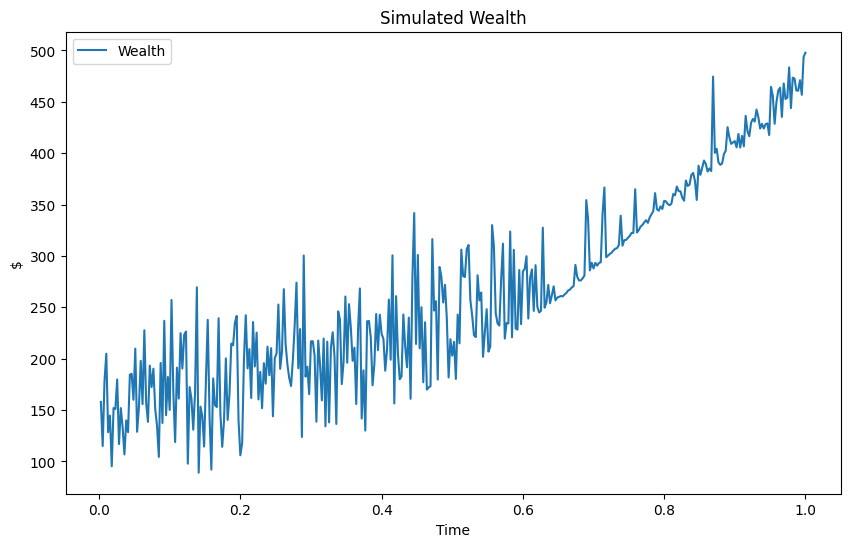

In [27]:
# Plot of Simulated Wealth
wealth = abs(Pi_1*S1)+abs(Pi_2*S2)

plt.figure(figsize=(10, 6))
plt.plot(tt[1:], wealth[1:], 'tab:blue', lw=1.5, label='Wealth')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Simulated Wealth')

Text(0.5, 1.0, 'Simulated Comparison Static vs Dynamic')

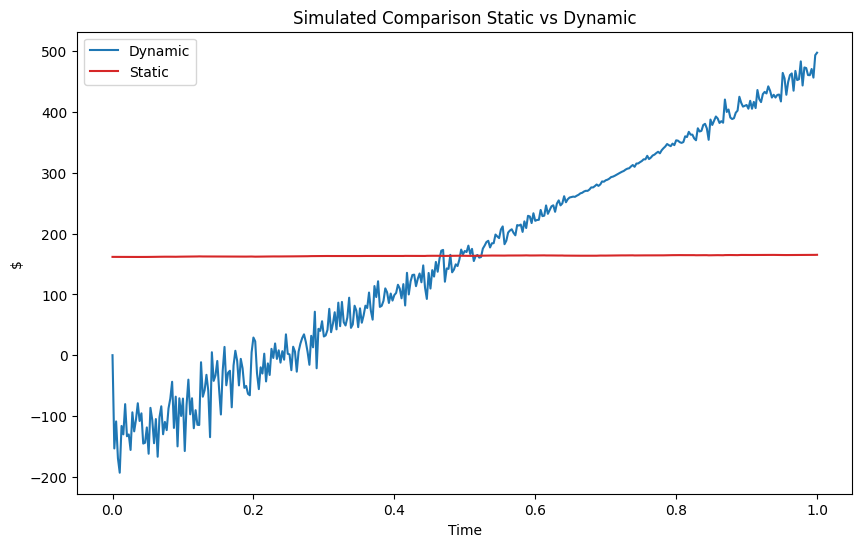

In [28]:
# Plot of Simulated Comaprision
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'tab:blue', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'tab:red', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Simulated Comparison Static vs Dynamic')